# HW2 Solution
## Student Name: Jason Miller

---

**NOTE:**
Change the notebook filename in this way:
```
hw2_solution_lastname_firstname.ipynb
```

---

As you can see, you can write an inline equation in this way: $P(\theta)$.

Or you can write a block equation in this way
$$
\mathcal{N}(\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

This is a [Markdown overview](https://colab.research.google.com/notebooks/markdown_guide.ipynb) if you are not familiar with this text editing formalism.

---


In [1]:
# You can only import these libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


## Problem 1 Solution
### 1.1 

*Given three matrices of weights W1, W2 and W3, explain whether there is any difference in terms of representational power between this network f1(x) = W3 max(0, W2 max(0, W1x)) and this network f2(x) = W3W2W1x.*

Yes, there is a difference, and f1 has more power.
The f2 network performs a linear transformation on x.
Although it is written as 3 matrices, 
it could be rewritten equivalently as just W1x 
with adjusted weights for W1.
In contrast, the f1 network includes the W1x transformation
followed by two non-linear transformations W2 and W3.
The f1 network therefore has more trainable parameters. 
Note this case was discussed in CS 676 deck 06 slide 8.

### 1.2
*What is the most important reason for training neural networks with stochastic gradient descent rather than gradient descent in batch mode?*

The most compelling reason is convergence on a minimum in fewer epochs. 
SGD updates weights after scoring every next training instance,
while BGD updates weights after scoring the whole dataset in one batch.

Updating weights based on a single instance invites high variance and thus erratic behavior. SGD could go off track if, for example, a few noisy instances were processed consecutively. (Stated in a positive way, SGD has more possibility to escape from a local mimimum; Bishop sec 5.2.4.) To mitigate the risk of erratic bahavior, SGD chooses each next instance at random. Also, SGD can choose without replacement so the entire training set is used eventually. A compromise approach called mini-batch uses subsets of some fixed size e.g. the Keras default of 32. Both mini-batch and SGD reduce the memory footprint compared to BGD. 

### 1.3
*In what scenario does it make sense to use K-fold cross validation?*

K-fold CV makes sense when designing and training a model with limited data. In each fold, a different random partition of the training data is set aside for validation. The results could be used to evaluate and alter the model hyperparameters. The model parameters from the most successful fold could saved for inference on unseed data. (In contrast to CV, if training data is plentiful, one pre-selected validation set can be used instead.)

### 1.4
*When you add regularization what happens to the training error? Why?*

Regularization increases training error by impeding the model's ability to overfit the training data. Models with many parameters, relative to the training data dimensions, can overfit by memorizing these specific training instances rather than generalizing. This was explined in CS 676 deck 06 slide 98. 

Regularization adds a function of the parameter weights to the cost function. The function can penalize large weights or non-zero weights. As the model tries to reduce training loss, this function acts to keep parameter weights small overall.

If the model was overfitting before, regularization will reduce that. But if the model was fast to converge to an optimal solution before, regularization will slow the convergence.


### 1.5 
*What is the purpose of using momentum with gradient descent?*

Momentum can speed convergence toward an optimum. It can even avoid bouncing out of an optimal region. See our plots below. The GD algorithm can change direction from point to point where the solution surface is not smooth, especially if the gradient is greater with respoect to some weights more than others. Momentum incorporates some of the prior direction in computing each next direction. This has a smoothing effect on the trajectory of the GD. 

### 1.6
*What is a training schedule, and why do we need it?*

A training schedule will adjust a hyperparameter as a function of the number of epochs of training. The schedule could apply to a learning rate coefficient, a momentum coefficient, or other hyperparameter. We need a training schedule to move quickly through a large area of the problem space initially, even at the risk of oscillating around a minumum; then to slow down later and as the minimum is approached. Without a schedule, the choices are to move quickly and possibly miss the minimum, or to move slowly and require many CPU cycles to approach the minimum.

### 1.7
*How do you do a grid search for tuning a hyperparameter?*

Select a series of hyperparameter values over some range. Compile one model for each value. Train and evaluate e.g. by K-fold cross validation, use use the same data for each experiment. Identify the value that minimizes validation loss. If the selected value is the minimum or maximum tested, then run a subsequent grid search in that region. If some intermediate value worked much better than its neighbors, then try more values in that region at lower granularity. The initial search might choose values on a log scale, with subsequent searches exploring a linear scale. A search for a single hyperparameter could be called a line search. Tests on two or more hyperparameters at once probably inspires the name grid search.

### 1.8
*What happens during training when an activation function saturates?*

This will lead to a vanishing or exploding gradient and learning will effectively end. Consider the case of a node whose sigmoid activation consistently produces a number close to zero. The gradient with respect to this node tends toward zero and GD has no incentive to update its inputs weights.  

### 1.9
*What is the purpose of batch normalization?*

The purpose is to avoid the vanishing or exploding gradient problem, in which weights tend toward zero or infinity, respectively. For BN, adjust a set of weights (e.g. all weights per layer) to zero mean and unit variance after each training batch. BN is easier than the alternative of searching for a set of initial weights that just happen to avoid the vanishing gradient. 

### 1.10
*What happens if you initialize the training of a neural network with weights that are too small?*

Many weights could hit zero during training, and remain zero permanently. This could effectively exclude participation by some parts of the model and lessen the model capacity. Having some weights stabilize at zero is desirable if training indicates they are irrelevant, we don't want weights to hit zero for no good reason.

### 1.11
*What is the goal of weight decay?*

The goal of weight decay is to avoid overfitting and thereby generalize from the training data. Weight decay pushes all weights toward similar, minimal values, thereby avoiding over-dependence on any feature subset. Weight decay is a form of regularization. 

### 1.12
*What is the difference between a same and a valid convolution*

With VALID convolution, output dimenison < input dimension. This happens if the filter size is larger than one because the filter never gets centered on any border pixels of the input.

With SAME convolution, output dimension == input dimension. This can be achieved by padding i.e. adding false border pixels to the input. 

Both methods introduce edge effects. SAME uses some artifical values at the borders. VALID is more true to the data but it incorporates border pixel data less than interior pixel data. 


### 1.13
*Why do we use 1x1 convolutions?*

A 1x1 convolution can decrease the depth of a pixel e.g. from depth=3 for 3-chanel RGB data to depth=1 for gray scale.

### 1.14
*Why do we freeze part of an architecture when we do transfer learning?*

We freeze some layers in order to incorporate pre-trained weights within those layers. We want to avoid re-training those layers because, presumably, they were trained on more data than we have, and they performed well previously. For CNN, it makes sense to freeze the initial layers that typically provide edge detection. Then, transfer learning uses our precious data to train only the later layers of our model, typically the layers that perform object recognition based on the detected edges. 

## Problem 2 Solution

Write here the solution to this problem using Markdown.


Please see the accompanying file, ComputationGraph2.png

## Problem 3 Solution

Write here the solution to this problem using Markdown.

In [2]:
# Code to solve Problem 3
# Remember that only numpy and matplotlib can be used

$J(w) = a + \mathbf{b}^{⊤}\mathbf{w} + \mathbf{w}^{⊤}\mathbf{Cw}$

### 3.1
*Write the gradient equation.*

$\nabla J_{w}(w)=0 + \mathbf{b} + 2\mathbf{Cw}$


### 3.2 
*Provide a Python implementation of the gradient descent algorithm with momentum acceleration*

In [3]:
a = 0
b = np.transpose(np.array([0,0]))
c11 = 0.5
c22 = 9.75
C = np.array([[c11,0.0],[0.0,c22]])
def cost(w):
    b_term = np.dot(b,w) 
    c_term = np.dot(w,C)
    c_term = np.dot(c_term,w)
    J = a + b_term + c_term
    return J
def gradient(w):
    g = b + 2*np.dot(C,w)
    return g
beta = 0  # momentum coefficient
def update_m(m,grad):
    m_new = beta*m + (1-beta)*grad
    return m_new
heta = 0.1  # learn rate
def update_w(w,m):
    w_new = w - heta*m
    return w_new
def initialize():
    global cost_list
    global weight_list
    global W1_list
    global W2_list
    global moment_list
    global grad_list
    cost_list=[]
    weight_list=[]
    W1_list=[]
    W2_list=[]
    moment_list=[]
    grad_list=[]
def show(i):
    print("iteration: ",i)
    print("cost:", cost_list[i],
        "gradient:", grad_list[i],
        "weight", weight_list[i],
        "momentum:", moment_list[i])
initialize()
w0 = np.transpose(np.array([10,1]))
m0 = np.transpose(np.array([0,0]))
c0 = cost(w0)
g0 = gradient(w0)

In [4]:
iterations=25
def compute():
    initialize()
    cost_list.append(c0)
    moment_list.append(m0)
    weight_list.append(w0)
    grad_list.append(g0)
    W1_list.append(w0[0])
    W2_list.append(w0[1])
    for k in range(0,iterations+1):
        wk = weight_list[k]
        mk = moment_list[k]
        gk = grad_list[k]
        mkplus1 = update_m(mk,gk)
        wkplus1 = update_w(wk,mkplus1)
        gkplus1 = gradient(wkplus1)
        ckplus1 = cost(wkplus1)
        moment_list.append(mkplus1)
        weight_list.append(wkplus1)
        W1_list.append(wkplus1[0])
        W2_list.append(wkplus1[1])
        grad_list.append(gkplus1)
        cost_list.append(ckplus1)
        #show(k)    # useful for debugging

In [5]:
def plot():
    w1_list = np.linspace(-10.0, 10.0, 100)
    w2_list = np.linspace(-2.0, 2.0, 100)
    W1, W2 = np.meshgrid(w1_list, w2_list)
    #J = np.square(W1) + np.square(W2)
    J = c11*W1*W1+c22*W2*W2
    #J = 0.5*W1*W1+9.75*W2*W2
    #J = 0.5*np.square(W1)+9.75*np.square(W2)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(W1, W2, J, 10)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Filled Contours Plot')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.plot(W1_list,W2_list,color='r')
    plt.show()

### 3.3
*Run the algorithm three times and perform 25 iterations each time.
...
At the end of each run display a contour plot figure of the function, and overlay on top of it the updates wk computed by the run, with line segments connecting the updates, showing the path followed by gradient descent.*

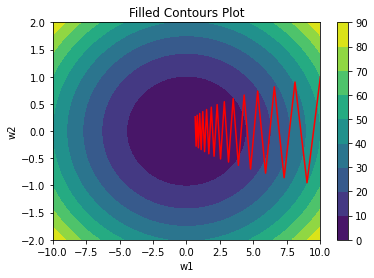

In [6]:
beta = 0.0  # momentum coefficient
compute()
plot()

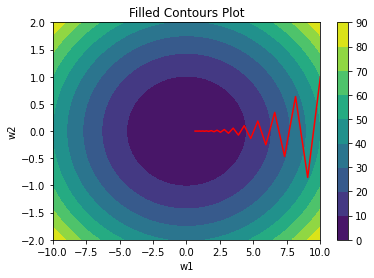

In [7]:
beta = 0.05  # momentum coefficient
compute()
plot()

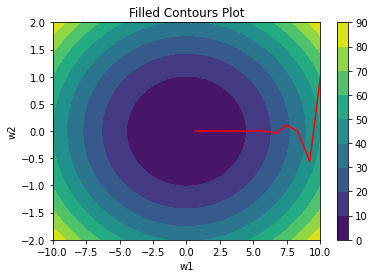

In [8]:
beta = 0.2  # momentum coefficient
compute()
plot()

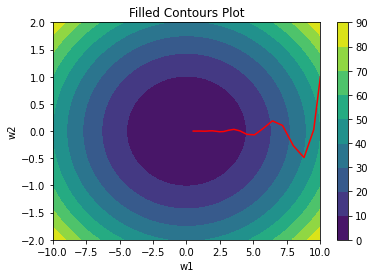

In [9]:
beta = 0.5  # momentum coefficient
compute()
plot()

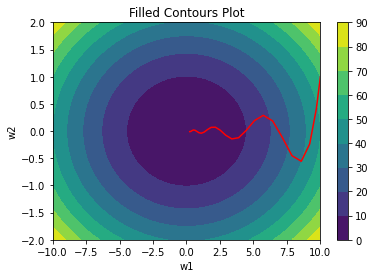

In [10]:
beta = 0.7  # momentum coefficient
compute()
plot()

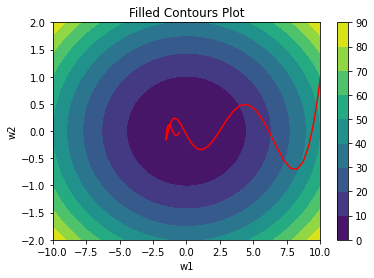

In [11]:
iterations=50
beta = 0.9  # momentum coefficient
compute()
plot()

### 3.4
*Explain what are the differences between the three contour plots, and what has caused them to be different.*

The successive plots show successively more incorporation of momentum.  Without momentum (first plot, beta=0%), gradient descent inverts its vertical component on every iteration, causing high variance to the velocity, and a slow approach to the solution minimum. Higher incorporation of momentum smooths the reverals of direction and encourages the trend toward the minimal solution. At near-saturation (last plot, beta=90%), the momentum is somewhat detrimental and the minimal solution was overshot at 25 iterations. (The last image incorporates extra iterations in which the gradient descent reversed course.)  